#                                    Sonoma County Animal Services
###                                                         INTAKE AND OUTCOMES 2016-2020

#####                                                                                     Project by Jenna Armstrong

#### Abstract
The focus of this project is to analyze the outcome of the dogs that have gone through the Sonoma County Animal Services between the years of 2015 and 2020. My target output is to find the breakdown of outcome types by percentage. I also want to identify if any factors (breed, sex, income type) have a different skew of outcomes vs the overall outcome. 

##### Using this dataset, I asked and answered the following questions:
1. What is the most common breed to go through the animal services?
2. What is the breakdown between sex?
3. What is the overall percentage breakdown of intake type? outcome type?
4. What is the average length of time the dog spends in the shelter?
5. Are there any outliers in length of stay?
6. What breed has the highest average stay?
7. Does the length of stay effect the outcome type?
8. Is there a correlation between intake type and outcome?

URL:https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw

## Importing Data

In [1]:
#import the proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import warnings

#filter out Warnings
warnings.filterwarnings('ignore')

#allwoing matplot plots to show in jupyter
%matplotlib inline

In [2]:
#import data file
df = pd.read_excel('data/Animal_Shelter_Intake_and_Outcome.xlsx' , sheet_name='Animal_Shelter_Intake_and_Outco')

df.head()

,Name,Type,Breeds,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome_Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,2014-04-11,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,2020-07-24,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,2019-08-04,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,2020-10-27,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,2018-01-16,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


In [3]:
#imported data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21904 entries, 0 to 21903
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  16280 non-null  object        
 1   Type                  21904 non-null  object        
 2   Breeds                21904 non-null  object        
 3   Color                 21904 non-null  object        
 4   Sex                   21904 non-null  object        
 5   Size                  21902 non-null  object        
 6   Date Of Birth         16578 non-null  datetime64[ns]
 7   Impound Number        21904 non-null  object        
 8   Kennel Number         21891 non-null  object        
 9   Animal ID             21904 non-null  object        
 10  Intake_Date           21904 non-null  datetime64[ns]
 11  Outcome_Date          21779 non-null  datetime64[ns]
 12  Days_in_Shelter       21904 non-null  int64         
 13  Intake_Type     

## Data Cleaning

Data cleaning is the process of preparing the data for analysis. Data almost never comes in clean and must be diagnosed to fix imperfections. Common data problems consist of: Missing data, outliers, duplicate rows,and general untidyiness which can prevent us from transforming our dataset to one suitable for analysis and reporting.

In [4]:
#drop the columns I don't want to focus on
df2 = df.drop(columns = ['Name','Color','Date Of Birth','Impound Number','Kennel Number','Intake Condition','Intake Subtype','Outcome Subtype','Outcome Condition','Intake Jurisdiction','Outcome Jurisdiction','Outcome Zip Code','Location','Count'])
df2.head()

,Type,Breeds,Sex,Size,Animal ID,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type
0,DOG,BEAGLE,Female,MED,A406645,2021-09-08,2021-09-11,3,STRAY,RETURN TO OWNER
1,DOG,CHIHUAHUA SH,Neutered,SMALL,A406003,2021-07-24,2021-09-11,49,STRAY,ADOPTION
2,CAT,DOMESTIC SH,Neutered,SMALL,A406151,2021-08-04,2021-09-11,38,STRAY,ADOPTION
3,CAT,SIAMESE,Spayed,KITTN,A402286,2021-01-30,2021-02-05,6,OWNER SURRENDER,ADOPTION
4,CAT,DOMESTIC SH,Neutered,SMALL,A402139,2021-01-16,2021-02-05,20,STRAY,ADOPTION


In [5]:
#set the Animal ID as the index
df3=df2.set_index('Animal ID')
df3.head()

,Type,Breeds,Sex,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type
Animal ID,,,,,,,,,
A406645,DOG,BEAGLE,Female,MED,2021-09-08,2021-09-11,3,STRAY,RETURN TO OWNER
A406003,DOG,CHIHUAHUA SH,Neutered,SMALL,2021-07-24,2021-09-11,49,STRAY,ADOPTION
A406151,CAT,DOMESTIC SH,Neutered,SMALL,2021-08-04,2021-09-11,38,STRAY,ADOPTION
A402286,CAT,SIAMESE,Spayed,KITTN,2021-01-30,2021-02-05,6,OWNER SURRENDER,ADOPTION
A402139,CAT,DOMESTIC SH,Neutered,SMALL,2021-01-16,2021-02-05,20,STRAY,ADOPTION


In [6]:
#use boolean to focus on only the dogs
is_dog = df3['Type']== 'DOG'
is_dog.head()

Animal ID
A406645     True
A406003     True
A406151    False
A402286    False
A402139    False
Name: Type, dtype: bool

In [7]:
#create new dataframe with only Dogs
df_dogs = df3[is_dog]
df_dogs.head()

,Type,Breeds,Sex,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type
Animal ID,,,,,,,,,
A406645,DOG,BEAGLE,Female,MED,2021-09-08,2021-09-11,3,STRAY,RETURN TO OWNER
A406003,DOG,CHIHUAHUA SH,Neutered,SMALL,2021-07-24,2021-09-11,49,STRAY,ADOPTION
A402348,DOG,LABRADOR RETR/MIX,Neutered,MED,2021-02-04,2021-02-05,1,CONFISCATE,RETURN TO OWNER
A402212,DOG,LABRADOR RETR,Female,MED,2021-01-07,2021-01-07,0,STRAY,RETURN TO OWNER
A402350,DOG,GERM SHEPHERD/MIX,Spayed,LARGE,2021-02-05,2021-02-05,0,STRAY,RETURN TO OWNER


In [8]:
#remove Type column
df_dogs= df_dogs.drop(columns = ['Type'])
df_dogs.head()

,Breeds,Sex,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type
Animal ID,,,,,,,,
A406645,BEAGLE,Female,MED,2021-09-08,2021-09-11,3,STRAY,RETURN TO OWNER
A406003,CHIHUAHUA SH,Neutered,SMALL,2021-07-24,2021-09-11,49,STRAY,ADOPTION
A402348,LABRADOR RETR/MIX,Neutered,MED,2021-02-04,2021-02-05,1,CONFISCATE,RETURN TO OWNER
A402212,LABRADOR RETR,Female,MED,2021-01-07,2021-01-07,0,STRAY,RETURN TO OWNER
A402350,GERM SHEPHERD/MIX,Spayed,LARGE,2021-02-05,2021-02-05,0,STRAY,RETURN TO OWNER


In [9]:
#filter by date intake >= 2016-1-1 to outcome <= 2020-12-31
my_data=df_dogs[(df_dogs['Intake_Date'] > '2015-12-31') & (df_dogs['Outcome_Date'] < '2021-01-01')]
my_data.head()

,Breeds,Sex,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type
Animal ID,,,,,,,,
A395511,GERM SHEPHERD/MIX,Neutered,MED,2020-01-09,2020-02-15,37,STRAY,ADOPTION
A343586,YORKSHIRE TERR,Female,SMALL,2019-07-09,2019-07-09,0,STRAY,RETURN TO OWNER
A340225,LABRADOR RETR/MIX,Male,LARGE,2016-07-29,2016-08-02,4,CONFISCATE,RETURN TO OWNER
A384162,QUEENSLAND HEEL/MIX,Neutered,MED,2019-02-02,2019-02-02,0,STRAY,RETURN TO OWNER
A333407,CHIHUAHUA SH,Spayed,TOY,2016-02-26,2016-03-15,18,STRAY,ADOPTION


# Editing Datapoints

In [10]:
#change the dtype of columns
my_data['Breeds']=my_data['Breeds'].astype('category')
my_data['Sex']=my_data['Sex'].astype('category')
my_data['Size']=my_data['Size'].astype('category')
my_data['Intake_Type']=my_data['Intake_Type'].astype('category')
my_data['Outcome_Type']=my_data['Outcome_Type'].astype('category')
my_data['Days_in_Shelter']=my_data['Days_in_Shelter'].astype('int64')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7602 entries, A395511 to A349854
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Breeds           7602 non-null   category      
 1   Sex              7602 non-null   category      
 2   Size             7602 non-null   category      
 3   Intake_Date      7602 non-null   datetime64[ns]
 4   Outcome_Date     7602 non-null   datetime64[ns]
 5   Days_in_Shelter  7602 non-null   int64         
 6   Intake_Type      7602 non-null   category      
 7   Outcome_Type     7602 non-null   category      
dtypes: category(5), datetime64[ns](2), int64(1)
memory usage: 303.9+ KB


In [11]:
#Drop any rows if it has missing data
my_data.dropna(axis=0, how='any')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7602 entries, A395511 to A349854
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Breeds           7602 non-null   category      
 1   Sex              7602 non-null   category      
 2   Size             7602 non-null   category      
 3   Intake_Date      7602 non-null   datetime64[ns]
 4   Outcome_Date     7602 non-null   datetime64[ns]
 5   Days_in_Shelter  7602 non-null   int64         
 6   Intake_Type      7602 non-null   category      
 7   Outcome_Type     7602 non-null   category      
dtypes: category(5), datetime64[ns](2), int64(1)
memory usage: 303.9+ KB


## Editing Dog Breed Data
There are many dog breeds and breed mixes. I want to group the dog breeds into larger buckets for better visualization

In [12]:
#unique values of dog breed
list_of_breeds = my_data['Breeds'].unique().tolist()
print(list_of_breeds)
len(list_of_breeds)

['GERM SHEPHERD/MIX', 'YORKSHIRE TERR', 'LABRADOR RETR/MIX', 'QUEENSLAND HEEL/MIX', 'CHIHUAHUA SH', 'CHIHUAHUA SH/MIX', 'GOLDEN RETR', 'RAT TERRIER/MIX', 'BOSTON TERRIER', 'MIN PINSCHER', 'ALASKAN HUSKY', 'GREAT PYRENEES/MIX', 'POINTER/MIX', 'PIT BULL', 'GERM SHEPHERD', 'PIT BULL/MIX', 'PARSON RUSS TER/MIX', 'GERM SHEPHERD/AKITA', 'AUST CATTLE DOG/MIX', 'SHIH TZU', 'PARSON RUSS TER/CHIHUAHUA SH', 'PIT BULL/LABRADOR RETR', 'CHIHUAHUA SH/PIT BULL', 'AM PIT BULL TER', 'BOXER/AM PIT BULL TER', 'LABRADOR RETR', 'BOXER/MIX', 'ALASKAN HUSKY/PIT BULL', 'BORDER COLLIE', 'SIBERIAN HUSKY', 'POODLE TOY', 'GREYHOUND/PIT BULL', 'POODLE MIN/MIX', 'SIBERIAN HUSKY/MIX', 'LABRADOR RETR/POODLE STND', 'MASTIFF', 'BELG MALINOIS/MIX', 'ALASKAN HUSKY/MIX', 'GERM SHEPHERD/SIBERIAN HUSKY', 'POMERANIAN', 'GERM SHEPHERD/WELSH CORGI CAR', 'BORDER COLLIE/MIX', 'POODLE MIN', 'BORDER COLLIE/ALASKAN HUSKY', 'MASTIFF/MIX', 'GREAT DANE', 'DUTCH SHEPHERD/MIX', 'PLOTT HOUND/MIX', 'CAIRN TERRIER/MIX', 'COCKER SPAN/CHIHUAH

608

In [13]:
#creates a list from the Breeds Column
Breed_list = my_data['Breeds']
len(Breed_list)

7602

#### Many Breeds have a description using two breeds. I want to categorize them by the first descriptor.

In [14]:
#for loop to create a list from Breed_list with dog breeds before '/'
New_column = []
new_name = ''
for name in Breed_list:
    for character in name:
        if character != '/':
            new_name += character
        else:
            break
    New_column.append(new_name)
    new_name = ''
#create new column from list       
my_data["Breed1"] = New_column  
my_data.head()

,Breeds,Sex,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type,Breed1
Animal ID,,,,,,,,,
A395511,GERM SHEPHERD/MIX,Neutered,MED,2020-01-09,2020-02-15,37,STRAY,ADOPTION,GERM SHEPHERD
A343586,YORKSHIRE TERR,Female,SMALL,2019-07-09,2019-07-09,0,STRAY,RETURN TO OWNER,YORKSHIRE TERR
A340225,LABRADOR RETR/MIX,Male,LARGE,2016-07-29,2016-08-02,4,CONFISCATE,RETURN TO OWNER,LABRADOR RETR
A384162,QUEENSLAND HEEL/MIX,Neutered,MED,2019-02-02,2019-02-02,0,STRAY,RETURN TO OWNER,QUEENSLAND HEEL
A333407,CHIHUAHUA SH,Spayed,TOY,2016-02-26,2016-03-15,18,STRAY,ADOPTION,CHIHUAHUA SH


In [15]:
#Unique values from the new Breed1 column
reduce_breeds_1 = my_data['Breed1'].unique().tolist()
reduce_breeds_1.sort()
print(reduce_breeds_1)
len(reduce_breeds_1)

['AFFENPINSCHER', 'AIREDALE TERR', 'AKBASH', 'AKITA', 'ALASK MALAMUTE', 'ALASKAN HUSKY', 'AM PIT BULL TER', 'AMER BULLDOG', 'AMER ESKIMO', 'AMER FOXHOUND', 'AMERICAN STAFF', 'ANATOL SHEPHERD', 'AUST CATTLE DOG', 'AUST KELPIE', 'AUST SHEPHERD', 'AUST TERRIER', 'BASENJI', 'BASSET HOUND', 'BEAGLE', 'BELG MALINOIS', 'BELG TERVUREN', 'BERNESE MTN DOG', 'BICHON FRISE', 'BLACK', 'BLACK MOUTH CUR', 'BLOODHOUND', 'BLUETICK HOUND', 'BORDER COLLIE', 'BORDER TERRIER', 'BOSTON TERRIER', 'BOUV FLANDRES', 'BOXER', 'BRITTANY', 'BRUSS GRIFFON', 'BULL TERRIER', 'BULLDOG', 'BULLMASTIFF', 'CAIRN TERRIER', 'CANE CORSO', 'CAROLINA DOG', 'CATAHOULA', 'CAVALIER SPAN', 'CHESA BAY RETR', 'CHIHUAHUA & MIN', 'CHIHUAHUA & MIX', 'CHIHUAHUA LH', 'CHIHUAHUA SH', 'CHINESE CRESTED', 'CHINESE SHARPEI', 'CHOW CHOW', 'CLUMBER SPAN', 'COCKER SPAN', 'COLLIE ROUGH', 'COLLIE SMOOTH', 'COTON DE TULEAR', 'DACHSHUND', 'DACHSHUND LH', 'DACHSHUND WH', 'DALMATIAN', 'DOBERMAN PINSCH', 'DOGO ARGENTINO', 'DOGUE DE BORDX', 'DUTCH SHEPH

160

In [16]:
#Create a list from the Breed1 Column
Breed_list = my_data['Breed1']
len(Breed_list)

7602

Fix misspelling and reduce multiple breed labels to one. There are some breeds that are labeled by coat, remove the coat labels.

In [17]:
#Create another list to fix spelling and combine breed designated by coat
New_column = []
new_BREED = ''
for breed in Breed_list:
    for name in breed:
        if 'LABRADOR' in breed:
            new_BREED = 'LABRADOR RETR'
        elif 'HUSKY' in breed:
            new_BREED = 'HUSKY'
        elif 'CHIHUAHUA' in breed:
            new_BREED = 'CHIHUAHUA'
        elif 'CORGI' in breed:
            new_BREED = 'CORGI'
        elif 'PITT BULL' in breed:
            new_BREED = 'PIT BULL'
        elif 'PIT BULL' in breed:
            new_BREED = 'PIT BULL'
        elif 'POODLE' in breed:
            new_BREED = 'POODLE'
        elif 'FOX TERR' in breed:
            new_BREED = 'FOX TERRIER'
        elif 'SCHNAUZER' in breed:
            new_BREED = 'SCHNAUZER'
        elif 'ROTTWEILER' in breed:
            new_BREED = 'ROTTWEILER'
        elif 'ST BERNARD' in breed:
            new_BREED = 'ST BERNARD'
        elif 'COLLIE' in breed:
            new_BREED = 'BORDER COLLIE'
        elif 'RIDGE' in breed:
            new_BREED = 'RHODESIAN RIDGE'
        elif 'DACHSHUND' in breed:
            new_BREED = 'DACHSHUND'
        else:
            new_BREED = breed
            break
    New_column.append(new_BREED)
    new_BREED = ''
#Creates new column Breed and inserts in position 2       
my_data.insert(2, "Breed", New_column)
my_data.head()

,Breeds,Sex,Breed,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type,Breed1
Animal ID,,,,,,,,,,
A395511,GERM SHEPHERD/MIX,Neutered,GERM SHEPHERD,MED,2020-01-09,2020-02-15,37,STRAY,ADOPTION,GERM SHEPHERD
A343586,YORKSHIRE TERR,Female,YORKSHIRE TERR,SMALL,2019-07-09,2019-07-09,0,STRAY,RETURN TO OWNER,YORKSHIRE TERR
A340225,LABRADOR RETR/MIX,Male,LABRADOR RETR,LARGE,2016-07-29,2016-08-02,4,CONFISCATE,RETURN TO OWNER,LABRADOR RETR
A384162,QUEENSLAND HEEL/MIX,Neutered,QUEENSLAND HEEL,MED,2019-02-02,2019-02-02,0,STRAY,RETURN TO OWNER,QUEENSLAND HEEL
A333407,CHIHUAHUA SH,Spayed,CHIHUAHUA,TOY,2016-02-26,2016-03-15,18,STRAY,ADOPTION,CHIHUAHUA SH


In [18]:
#Final list of unique values of dog breeds
final_breeds = my_data['Breed'].unique().tolist()
final_breeds.sort()
print(final_breeds)
len(final_breeds)

['AFFENPINSCHER', 'AIREDALE TERR', 'AKBASH', 'AKITA', 'ALASK MALAMUTE', 'AMER BULLDOG', 'AMER ESKIMO', 'AMER FOXHOUND', 'AMERICAN STAFF', 'ANATOL SHEPHERD', 'AUST CATTLE DOG', 'AUST KELPIE', 'AUST SHEPHERD', 'AUST TERRIER', 'BASENJI', 'BASSET HOUND', 'BEAGLE', 'BELG MALINOIS', 'BELG TERVUREN', 'BERNESE MTN DOG', 'BICHON FRISE', 'BLACK', 'BLACK MOUTH CUR', 'BLOODHOUND', 'BLUETICK HOUND', 'BORDER COLLIE', 'BORDER TERRIER', 'BOSTON TERRIER', 'BOUV FLANDRES', 'BOXER', 'BRITTANY', 'BRUSS GRIFFON', 'BULL TERRIER', 'BULLDOG', 'BULLMASTIFF', 'CAIRN TERRIER', 'CANE CORSO', 'CAROLINA DOG', 'CATAHOULA', 'CAVALIER SPAN', 'CHESA BAY RETR', 'CHIHUAHUA', 'CHINESE CRESTED', 'CHINESE SHARPEI', 'CHOW CHOW', 'CLUMBER SPAN', 'COCKER SPAN', 'CORGI', 'COTON DE TULEAR', 'DACHSHUND', 'DALMATIAN', 'DOBERMAN PINSCH', 'DOGO ARGENTINO', 'DOGUE DE BORDX', 'DUTCH SHEPHERD', 'ENG BULLDOG', 'ENG COONHOUND', 'ENG FOXHOUND', 'ENG POINTER', 'ENG SETTER', 'ENG SPRNGR SPAN', 'FLAT COAT RETR', 'FOX TERRIER', 'FRENCH BULLDO

139

In [19]:
#Drop the other Breed columns I'm not using
my_data = my_data.drop(columns =['Breed1'])
my_data=my_data.drop(columns=['Breeds'])
#Drop duplicate entries
my_data=my_data.drop_duplicates()
my_data.head()

,Sex,Breed,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type
Animal ID,,,,,,,,
A395511,Neutered,GERM SHEPHERD,MED,2020-01-09,2020-02-15,37,STRAY,ADOPTION
A343586,Female,YORKSHIRE TERR,SMALL,2019-07-09,2019-07-09,0,STRAY,RETURN TO OWNER
A340225,Male,LABRADOR RETR,LARGE,2016-07-29,2016-08-02,4,CONFISCATE,RETURN TO OWNER
A384162,Neutered,QUEENSLAND HEEL,MED,2019-02-02,2019-02-02,0,STRAY,RETURN TO OWNER
A333407,Spayed,CHIHUAHUA,TOY,2016-02-26,2016-03-15,18,STRAY,ADOPTION


In [20]:
#Create a column for Outcome_Year
my_data['Outcome_Year']= my_data['Outcome_Date'].dt.year
my_data.head()

,Sex,Breed,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type,Outcome_Year
Animal ID,,,,,,,,,
A395511,Neutered,GERM SHEPHERD,MED,2020-01-09,2020-02-15,37,STRAY,ADOPTION,2020
A343586,Female,YORKSHIRE TERR,SMALL,2019-07-09,2019-07-09,0,STRAY,RETURN TO OWNER,2019
A340225,Male,LABRADOR RETR,LARGE,2016-07-29,2016-08-02,4,CONFISCATE,RETURN TO OWNER,2016
A384162,Neutered,QUEENSLAND HEEL,MED,2019-02-02,2019-02-02,0,STRAY,RETURN TO OWNER,2019
A333407,Spayed,CHIHUAHUA,TOY,2016-02-26,2016-03-15,18,STRAY,ADOPTION,2016


#### I want to make sure no other columns have mispelling

In [21]:
#Print list of unique values in all columns to ensure no misspellings
Sex = my_data['Sex'].unique().tolist()
Sex.sort()
print(Sex)

Size = my_data['Size'].unique().tolist()
Size.sort()
print(Size)

Intake = my_data['Intake_Type'].unique().tolist()
Intake.sort()
print(Intake)

Outcome = my_data['Outcome_Type'].unique().tolist()
Outcome.sort()
print(Outcome)

['Female', 'Male', 'Neutered', 'Spayed']
['LARGE', 'MED', 'PUPPY', 'SMALL', 'TOY', 'X-LRG']
['ADOPTION RETURN', 'CONFISCATE', 'OWNER SURRENDER', 'QUARANTINE', 'STRAY', 'TRANSFER']
['ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER']


In [22]:
#Change dtype of created Breed column
my_data['Breed']=my_data['Breed'].astype('category')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7364 entries, A395511 to A349854
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sex              7364 non-null   category      
 1   Breed            7364 non-null   category      
 2   Size             7364 non-null   category      
 3   Intake_Date      7364 non-null   datetime64[ns]
 4   Outcome_Date     7364 non-null   datetime64[ns]
 5   Days_in_Shelter  7364 non-null   int64         
 6   Intake_Type      7364 non-null   category      
 7   Outcome_Type     7364 non-null   category      
 8   Outcome_Year     7364 non-null   int64         
dtypes: category(5), datetime64[ns](2), int64(2)
memory usage: 336.8+ KB


In [23]:
#Sort final data by descending Intake Date
my_data=my_data.sort_values('Intake_Date', ascending=False )
my_data.head(10)

,Sex,Breed,Size,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Outcome_Type,Outcome_Year
Animal ID,,,,,,,,,
A401929,Spayed,COTON DE TULEAR,SMALL,2020-12-31,2020-12-31,0,STRAY,RETURN TO OWNER,2020
A399491,Female,PIT BULL,LARGE,2020-12-30,2020-12-30,0,STRAY,RETURN TO OWNER,2020
A401889,Male,CHIHUAHUA,SMALL,2020-12-28,2020-12-29,1,CONFISCATE,RETURN TO OWNER,2020
A379486,Spayed,LABRADOR RETR,MED,2020-12-28,2020-12-28,0,STRAY,RETURN TO OWNER,2020
A389040,Spayed,PIT BULL,SMALL,2020-12-27,2020-12-27,0,STRAY,RETURN TO OWNER,2020
A401884,Male,CHIHUAHUA,TOY,2020-12-26,2020-12-31,5,STRAY,RETURN TO OWNER,2020
A401885,Male,POODLE,SMALL,2020-12-26,2020-12-31,5,STRAY,RETURN TO OWNER,2020
A401865,Female,HUSKY,MED,2020-12-24,2020-12-29,5,STRAY,RETURN TO OWNER,2020
A401854,Spayed,LABRADOR RETR,MED,2020-12-23,2020-12-24,1,STRAY,RETURN TO OWNER,2020


In [24]:
my_data.describe()

,Days_in_Shelter,Outcome_Year
count,7364.000000,7364.000000
mean,15.071293,2017.781097
std,24.368341,1.350808
min,0.000000,2016.000000
25%,1.000000,2017.000000
50%,7.000000,2018.000000
75%,20.000000,2019.000000
max,379.000000,2020.000000


In [25]:
my_data.describe(include=['category'])

,Sex,Breed,Size,Intake_Type,Outcome_Type
count,7364,7364,7364,7364,7364
unique,4,139,6,6,5
top,Neutered,PIT BULL,MED,STRAY,RETURN TO OWNER
freq,2625,1499,2244,5592,3863


## Data Visualization and Analysis

I can answer my proposed questions through data visualizations and data summaries

In [26]:
#Set Theme for all graphs
sns.set_theme(context = 'notebook', style = 'whitegrid', palette ='Dark2', font = 'Verdana')

### What is the most common breed to go through the Animal Services?

Text(0.5, 1.0, 'Breeds in SCAS 2015-2020')

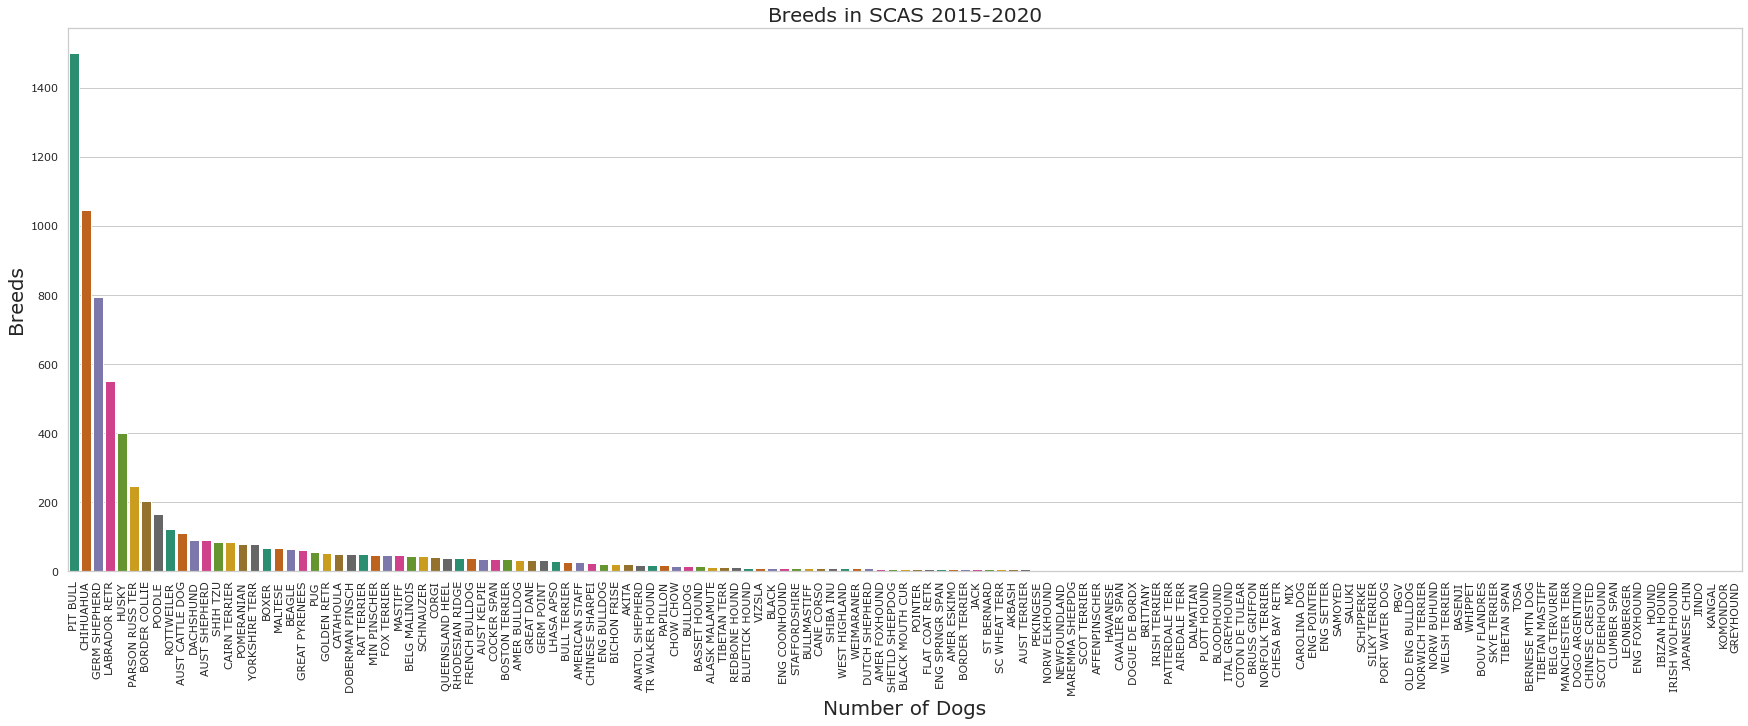

In [27]:
#Graph of counts of dogs by breed
plt.figure(figsize=(30,10))
plt.tight_layout()
plt.xticks(rotation=90)
Breed_count = sns.countplot(x='Breed', data=my_data, order = my_data['Breed'].value_counts().index,palette ='Dark2')
Breed_count.set_ylabel("Breeds", fontsize = 20)
Breed_count.set_xlabel("Number of Dogs", fontsize = 20)
Breed_count.set_title('Breeds in SCAS 2015-2020', fontsize = 20)

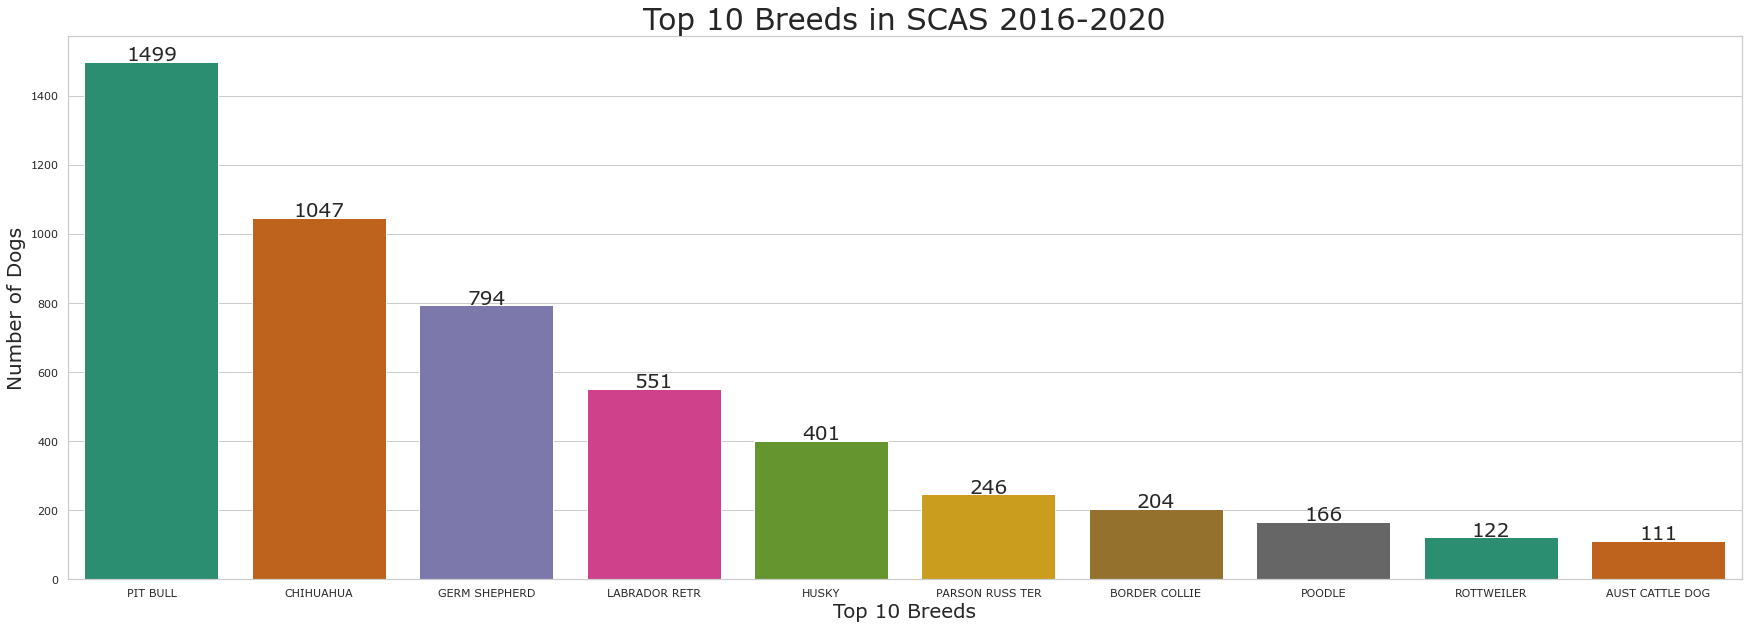

In [28]:
#Top 10 count breakdown by Breed
plt.figure(figsize=(30,10))
Breed_Top_10 = sns.countplot(x ='Breed', data=my_data, order = my_data['Breed'].value_counts().index[:10], palette ='Dark2')
Breed_Top_10.set_xlabel("Top 10 Breeds", fontsize = 20)
Breed_Top_10.set_ylabel("Number of Dogs", fontsize = 20)
Breed_Top_10.set_title('Top 10 Breeds in SCAS 2016-2020', fontsize = 30)

for rect in Breed_Top_10.patches:
    Breed_Top_10.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 3 ,rect.get_height(), horizontalalignment='center', fontsize = 20)

In [29]:
#Pivot Table to represent the count of top 10 breeds in the shelter by year
print('Top 10 Breed Count By Year')
Table1=pd.pivot_table(my_data, columns=['Outcome_Year'],index='Breed',values='Outcome_Type',margins= True, margins_name='Total', aggfunc=len, fill_value=0)
Table1= Table1.sort_values('Total' ,ascending=False)
Table1.head(11)

Top 10 Breed Count By Year


Outcome_Year,2016,2017,2018,2019,2020,Total
Breed,,,,,,
Total,1692,1669,1517,1531,955,7364
PIT BULL,348,332,321,277,221,1499
CHIHUAHUA,236,265,216,210,120,1047
GERM SHEPHERD,151,177,170,176,120,794
LABRADOR RETR,175,134,104,91,47,551
HUSKY,62,60,87,118,74,401
PARSON RUSS TER,60,43,51,67,25,246
BORDER COLLIE,41,51,57,36,19,204
POODLE,41,40,26,34,25,166


In [30]:
#Calculations
Total_Dogs = 7364
Top_10 = 1499+1047+794+551+401+246+204+166+122+111
Total_PB = 1499
Percent_PB = Total_PB/Total_Dogs
Percent_10 = Top_10/ Total_Dogs

print("Total Dogs: ", Total_Dogs,"\nTotal in Top 10: ",Top_10, "\n% Top 10: ", '{:2.3}%'.format(Percent_10*100), '\nTotal Pit Bulls: ', Total_PB, '\n% Pit Bulls: ', '{:2.3}%'.format(Percent_PB*100))

Total Dogs:  7364 
Total in Top 10:  5141 
% Top 10:  69.8% 
Total Pit Bulls:  1499 
% Pit Bulls:  20.4%


The Pit Bull is consistantly the most populous breed to go through the shelter. Followed by the Chihuahua as the second most. The following 8 breeds interchange in standings through 2016-2020. Pit Bulls make up for 1/5th of the dogs that come through the shelter. The top 10 breeds consist of almost 70% of the dogs that come through the shelter.

### What is the breakdown between sex?

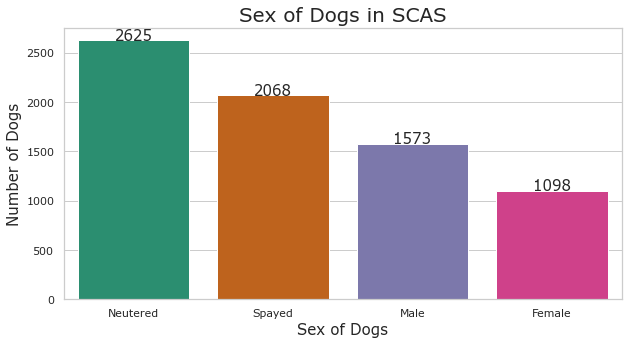

In [31]:
#Breakdown of shelter dogs by Sex
plt.figure(figsize=(10,5))
Sex_year = sns.countplot(x ='Sex', data=my_data, order = my_data['Sex'].value_counts().index[:10], palette ='Dark2')
Sex_year.set_xlabel("Sex of Dogs", fontsize = 15)
Sex_year.set_ylabel("Number of Dogs", fontsize = 15)
Sex_year.set_title('Sex of Dogs in SCAS', fontsize = 20)

for rect in Sex_year.patches:
    Sex_year.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+5, rect.get_height(), horizontalalignment='center', fontsize = 15)

In [32]:
#Calculations
Female_Total= 2068+1098
Male_Total=2625+1573
Percent_F = Female_Total/(Female_Total + Male_Total)
Percent_M = Male_Total/(Female_Total + Male_Total)

print("Total Female: ", Female_Total, "\n% Female: ", '{:2.3}%'.format(Percent_F*100), '\nTotal Male: ', Male_Total, '\n% Male: ', '{:2.3}%'.format(Percent_M*100))

Total Female:  3166 
% Female:  43.0% 
Total Male:  4198 
% Male:  57.0%


As shown by the graph, majority of the dog brought into the shelter between 2016-2020 were Neutered Males. Total males consist of almost 3/5 of the shelter dogs.

### What is the overall percentage breakdown of intake type? outcome type?

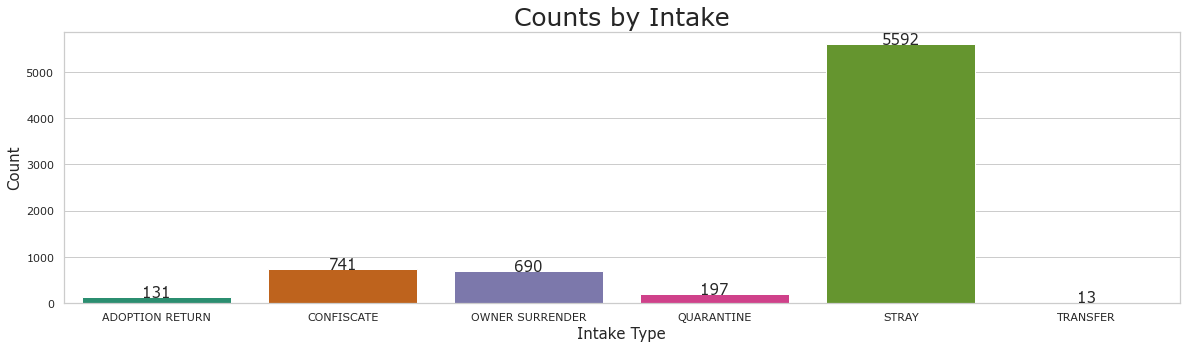

In [33]:
#Percentage breakdown of Intake Type
plt.figure(figsize=(20,5))
intake= sns.countplot(x ='Intake_Type', data=my_data, palette ='Dark2')
intake.set_ylabel('Count',fontsize=15)
intake.set_xlabel('Intake Type', fontsize=15)
intake.set_title('Counts by Intake',fontsize = 25)

for rect in intake.patches:
    intake.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height().round(2), horizontalalignment='center', fontsize = 15)

In [34]:
#Intake Percentages
AR = '{:4.2f}'.format(131/7364*100)
CON = '{:4.2f}'.format(741/7364*100)
OS = '{:4.2f}'.format(690/7364*100)
QU = '{:4.2f}'.format(197/7364*100)
ST = '{:4.2f}'.format(5592/7364*100)
T_IN = '{:4.2f}'.format(13/7364*100)
print(AR,CON,OS,QU,ST,T_IN)

1.78 10.06 9.37 2.68 75.94 0.18


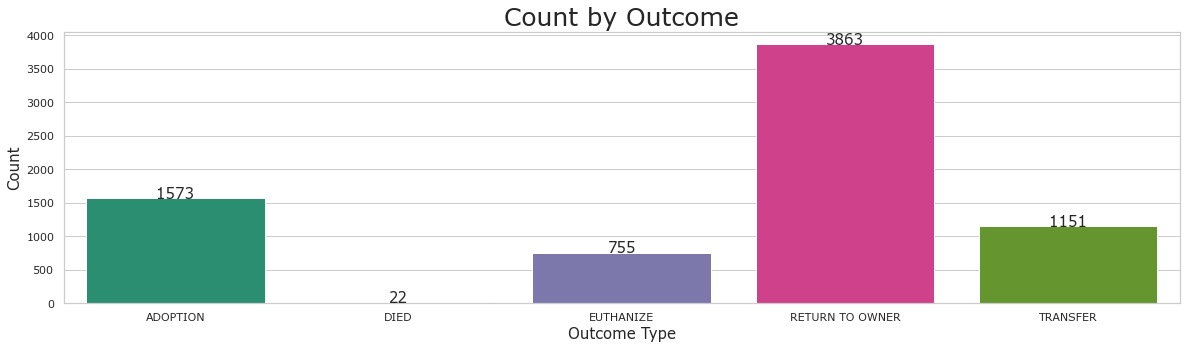

In [35]:
#Outcome Type by Percentage breakdown
plt.figure(figsize=(20,5))
outcome= sns.countplot(x ='Outcome_Type', data=my_data, palette ='Dark2')
outcome.set_ylabel('Count',fontsize=15)
outcome.set_xlabel('Outcome Type', fontsize=15)
outcome.set_title('Count by Outcome', fontsize = 25)

for rect in outcome.patches:
    outcome.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height().round(2), horizontalalignment='center', fontsize = 15)

In [36]:
#Outcome Percentages
AD = '{:4.2f}'.format(1573/7364*100)
D = '{:4.2f}'.format(22/7364*100)
EU = '{:4.2f}'.format(755/7364*100)
RTO = '{:4.2f}'.format(3863/7364*100)
T_OUT = '{:4.2f}'.format(1151/7364*100)
print(AD,D,EU,RTO,T_OUT)

21.36 0.30 10.25 52.46 15.63


In [37]:
#Pivot Table to represent the count of intake and outcome type
print('Count of Dogs Intake and Outcome')
Table2=pd.pivot_table(my_data, columns=['Outcome_Type'],index='Intake_Type',values='Breed',margins= True, margins_name='Total', aggfunc=len, fill_value=0)
Table2.head(11)

Count of Dogs Intake and Outcome


Outcome_Type,ADOPTION,DIED,EUTHANIZE,RETURN TO OWNER,TRANSFER,Total
Intake_Type,,,,,,
ADOPTION RETURN,95,0,13,1,22,131
CONFISCATE,50,4,39,594,54,741
OWNER SURRENDER,268,0,185,30,207,690
QUARANTINE,4,5,55,124,9,197
STRAY,1152,13,458,3114,855,5592
TRANSFER,4,0,5,0,4,13
Total,1573,22,755,3863,1151,7364


In [38]:
#Calculations
print('% Intake Breakdown: \n \tAdoption Return:{0}% \n \tConfiscate:\t{1}% \n \tOwner Surender:\t{2}% \n \tQuarantine:\t{3}% \n \tStray:\t\t{4}% \n \tTransfer:\t{5}%'.format(AR,CON,OS,QU,ST,T_IN))
print('\n% Outcome Breakdown: \n \tAdoption:\t{}% \n \tDied:\t\t{}% \n \tEuthanize:\t{}% \n \tReturn to Owner:{}% \n \tTransfer:\t{}%'.format(AD,D,EU,RTO,T_OUT))

% Intake Breakdown: 
 	Adoption Return:1.78% 
 	Confiscate:	10.06% 
 	Owner Surender:	9.37% 
 	Quarantine:	2.68% 
 	Stray:		75.94% 
 	Transfer:	0.18%

% Outcome Breakdown: 
 	Adoption:	21.36% 
 	Died:		0.30% 
 	Euthanize:	10.25% 
 	Return to Owner:52.46% 
 	Transfer:	15.63%


### What is the average length of time the dog spends in the shelter?
### Are there any outliers in length of stay?

Text(0.5, 1.0, 'Number of Days Spent in Shelter with Outliers')

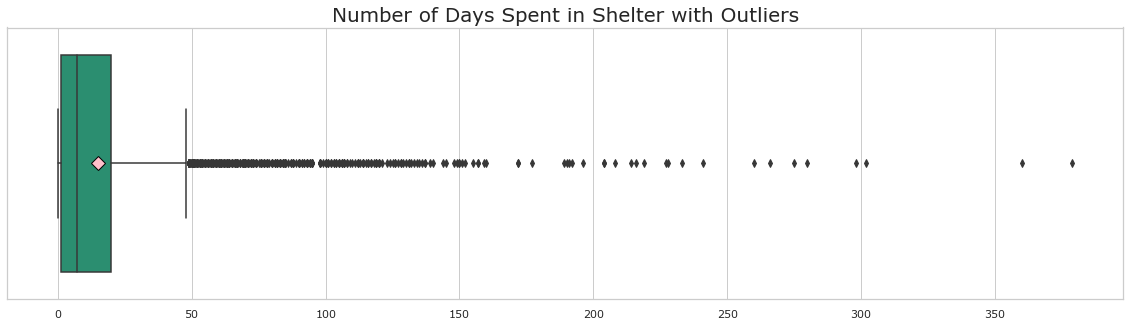

In [39]:
#Box plot of Days Spent in the Shelter
plt.figure(figsize=(20,5))
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='pink', markersize=10)
Days_w_outlier=sns.boxplot(x=my_data['Days_in_Shelter'], showmeans= True, meanprops=meanpointprops)
Days_w_outlier.set_xlabel("")
Days_w_outlier.set_title('Number of Days Spent in Shelter with Outliers', fontsize = 20)

Text(0.5, 1.0, 'Number of Days Spent in Shelter without Outliers')

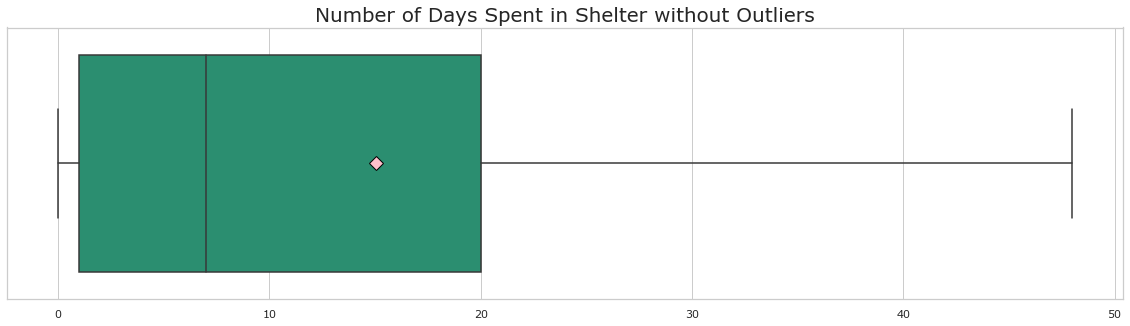

In [40]:
#Boxplot without Outliers
plt.figure(figsize=(20,5))
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='pink', markersize=10)
Days_wo_outlier=sns.boxplot(x=my_data['Days_in_Shelter'], showmeans= True, meanprops=meanpointprops , showfliers=False)
Days_wo_outlier.set_xlabel("")
Days_wo_outlier.set_title('Number of Days Spent in Shelter without Outliers', fontsize = 20)

Text(0.5, 1.0, 'Number of Days Spent in Shelter Only Outliers')

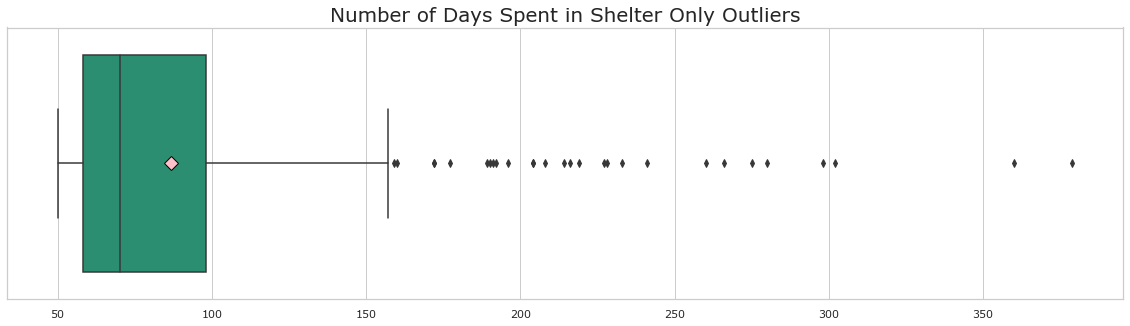

In [41]:
#Boxplot of Outliers
plt.figure(figsize=(20,5))
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='pink', markersize=10)
Outlier_days=sns.boxplot(data=my_data[my_data.Days_in_Shelter > 49], x='Days_in_Shelter',showmeans= True, meanprops=meanpointprops)
Outlier_days.set_xlabel("")
Outlier_days.set_title('Number of Days Spent in Shelter Only Outliers', fontsize = 20)

In [42]:
#Pivot table for Mean and Median Stay in the Shelter
print('Mean and Median Days in the Shelter by Year')
print('Days in Shelter Percentiles:',np.percentile(my_data['Days_in_Shelter'],[5,25,50,75,95]))
Table3=pd.pivot_table(my_data,index='Outcome_Year',values='Days_in_Shelter', aggfunc=['mean','median'],margins= True, margins_name='Total', fill_value=0)
Table3.head(11)

Mean and Median Days in the Shelter by Year
Days in Shelter Percentiles: [ 0.  1.  7. 20. 54.]


,mean,median
,Days_in_Shelter,Days_in_Shelter
Outcome_Year,,
2016,13.546099,6
2017,15.711204,7
2018,15.799604,7
2019,15.438276,7
2020,14.909948,7
Total,15.071293,7


In [43]:
#Maximum Day spent in the shelter
print('Longest Stay Before Outcome by Year')
Table4=pd.pivot_table(my_data,index='Outcome_Type',columns='Outcome_Year',values='Days_in_Shelter', aggfunc= "max", margins= True, margins_name='Total', fill_value=0)
Table4.head(11)

Longest Stay Before Outcome by Year


Outcome_Year,2016,2017,2018,2019,2020,Total
Outcome_Type,,,,,,
ADOPTION,192,302,214,298,88,302
DIED,46,48,35,6,241,241
EUTHANIZE,172,266,208,360,66,360
RETURN TO OWNER,34,150,379,47,204,379
TRANSFER,86,191,131,227,112,227
Total,192,302,379,360,241,379


Based on the graphed data above, there are many outliers that skew the data. Even with a data point of one dog staying over a year in the shelter, the average stay is 15 days. Half of all dogs stay less than 7 days. The data has a positive skew with most of the data being on the left side of the boxplot. 95% of the dogs stayed less than 54 days.

### What breed has the highest average stay?

In [44]:
#Average Stay length by breed
print('Average Stay by Breed')
Table5=pd.pivot_table(data=my_data,index='Breed',values='Days_in_Shelter', fill_value=0)
Table5= Table5.sort_values('Days_in_Shelter',ascending=False)
Table5.head(5)

Average Stay by Breed


,Days_in_Shelter
Breed,
ENG FOXHOUND,59.00
DOGUE DE BORDX,51.25
MANCHESTER TERR,47.00
BULLMASTIFF,42.10
ENG POINTER,40.00


The English Foxhound has the highest average stay at 59 days.

### Does the length of stay effect the outcome type?

Text(0.5, 1.0, 'Skew of Days by Outcome')

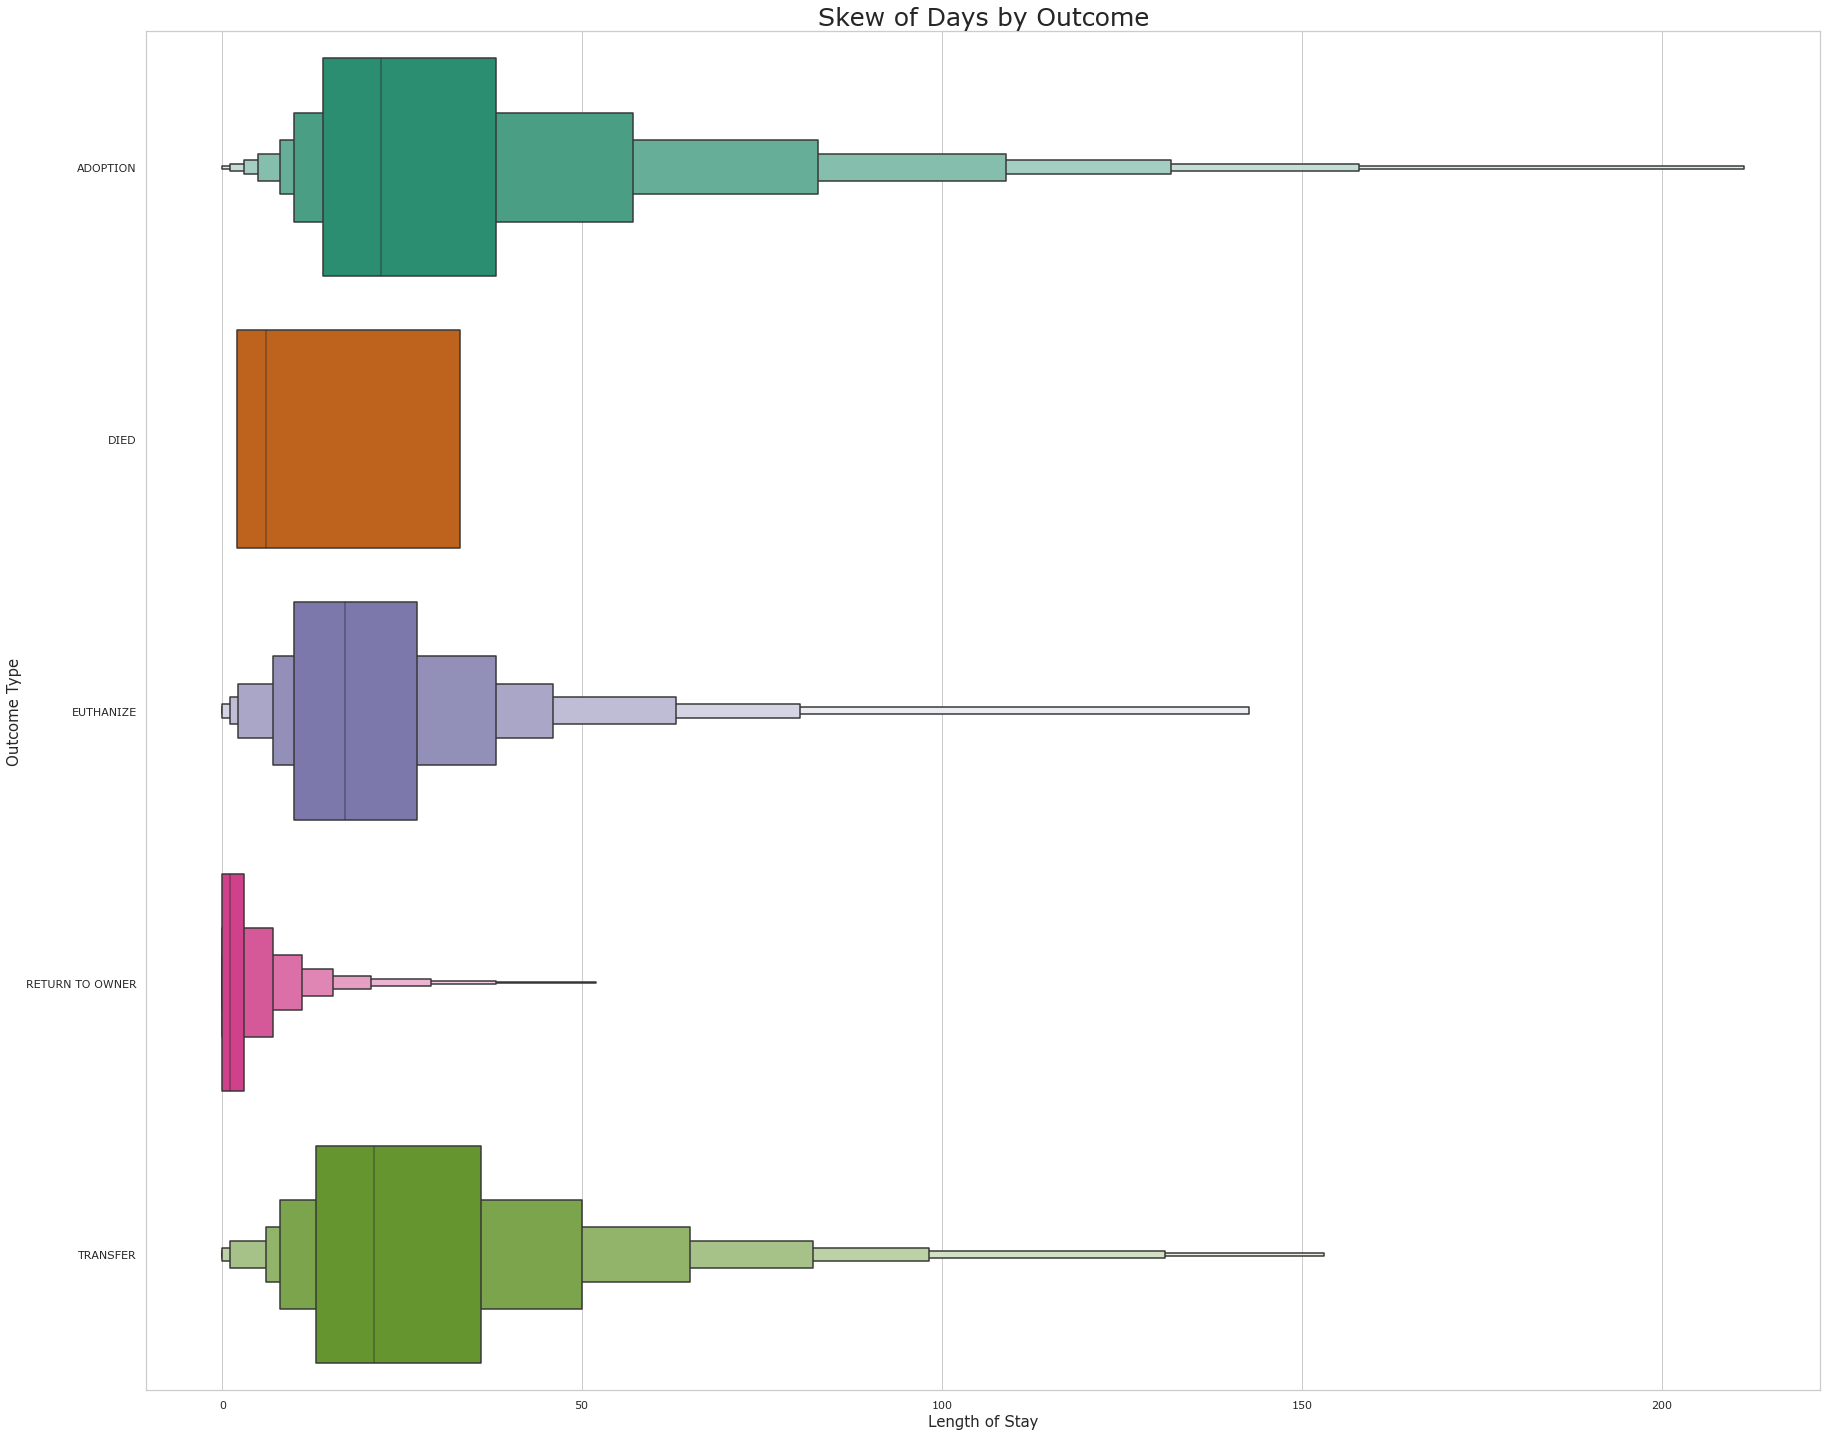

In [45]:
#representation of length of stay before an Outcome is reached
plt.figure(figsize=(30,25))
Days_outcome = sns.boxenplot(data=my_data, x="Days_in_Shelter", y="Outcome_Type", showfliers=False)
Days_outcome.set_xlabel('Length of Stay',fontsize=15)
Days_outcome.set_ylabel('Outcome Type', fontsize=15)
Days_outcome.set_title('Skew of Days by Outcome', fontsize = 25)

Text(0.5, 1.0, 'Stay Over Time')

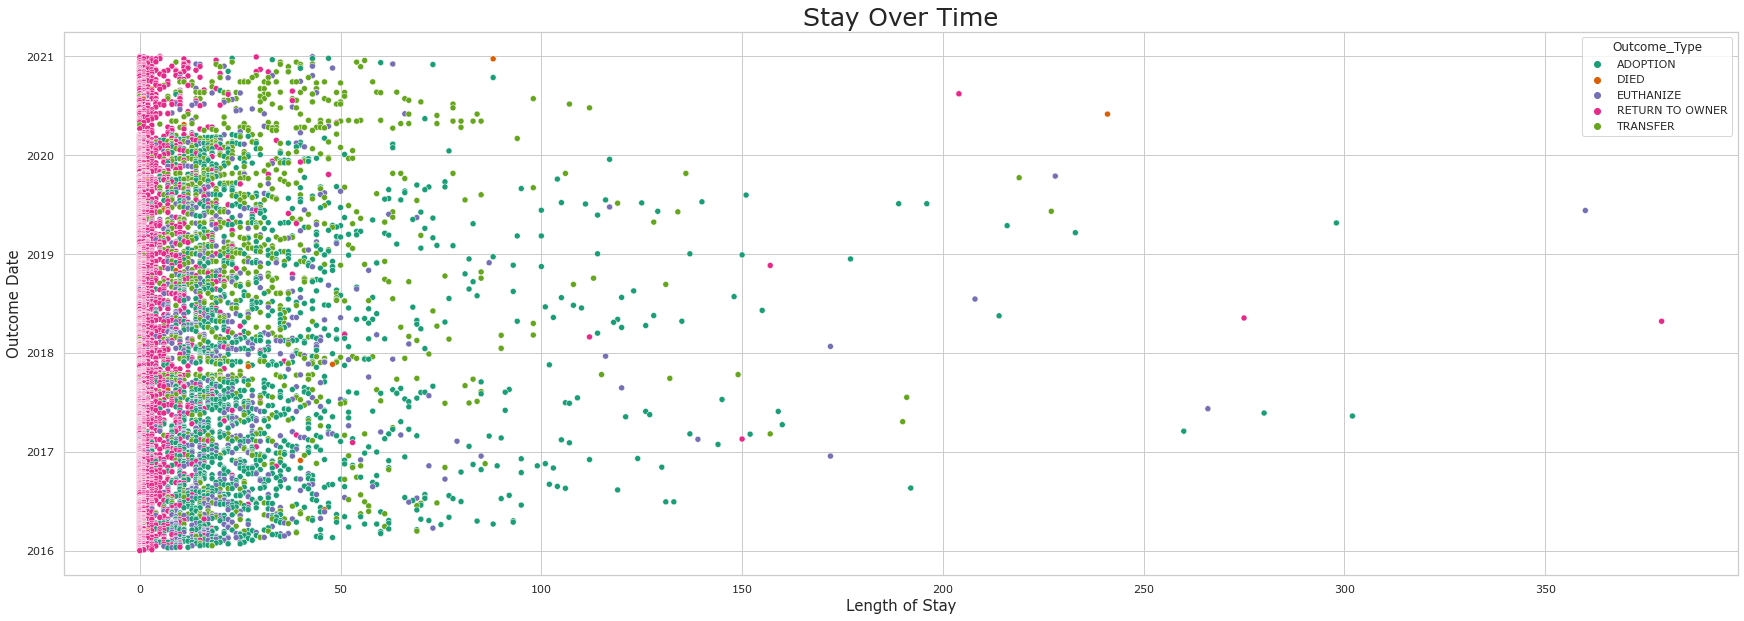

In [46]:
plt.figure(figsize=(30,10))
Time_Shelter = sns.scatterplot(y= 'Outcome_Date',x='Days_in_Shelter',hue='Outcome_Type',data=my_data)
Time_Shelter.set_ylabel('Outcome Date',fontsize=15)
Time_Shelter.set_xlabel('Length of Stay', fontsize=15)
Time_Shelter.set_title('Stay Over Time', fontsize = 25)

Text(0.5, 1.0, 'Stay Over Time')

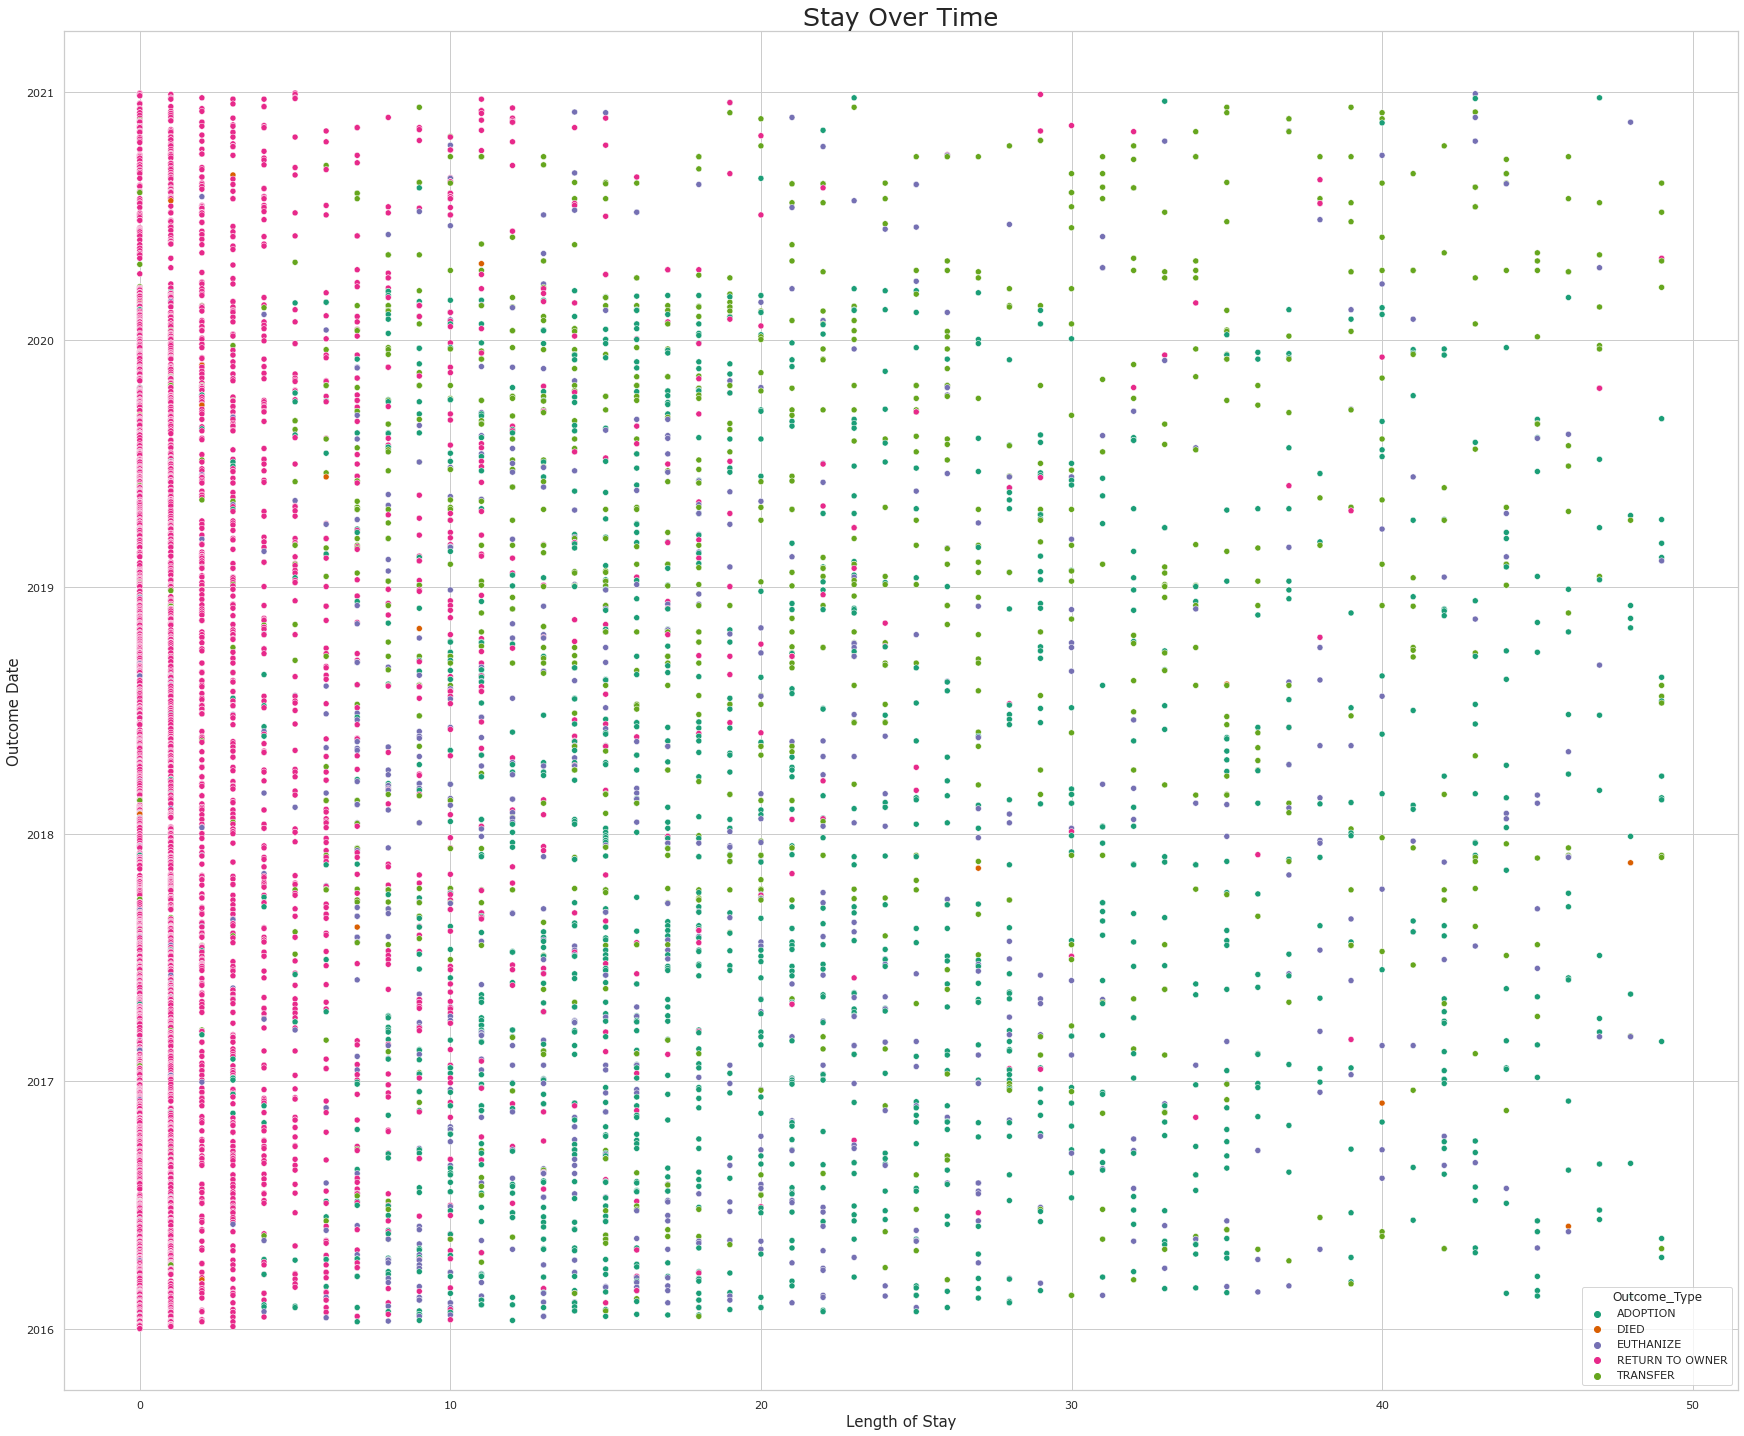

In [47]:
plt.figure(figsize=(30,25))
Time_Shelter1 = sns.scatterplot(y= 'Outcome_Date',x='Days_in_Shelter',hue='Outcome_Type',data=my_data[my_data.Days_in_Shelter <50])
Time_Shelter1.set_ylabel('Outcome Date',fontsize=15)
Time_Shelter1.set_xlabel('Length of Stay', fontsize=15)
Time_Shelter1.set_title('Stay Over Time', fontsize = 25)

In [48]:
print('Mean and Median Days in the Shelter by Outcome')
Table6=pd.pivot_table(my_data,index='Outcome_Type',values='Days_in_Shelter', aggfunc=['mean','median','min','max','std'], fill_value=0)
Table6.head(11)

Mean and Median Days in the Shelter by Outcome


,mean,median,min,max,std
,Days_in_Shelter,Days_in_Shelter,Days_in_Shelter,Days_in_Shelter,Days_in_Shelter
Outcome_Type,,,,,
ADOPTION,31.575334,22,0,302,30.981263
DIED,26.454545,6,0,241,52.909381
EUTHANIZE,22.013245,17,0,360,25.605295
RETURN TO OWNER,3.155061,1,0,379,10.771677
TRANSFER,27.738488,21,0,227,23.979163


I assumed that the longer a dog was in the shelter, the more likely it would be euthanized or transfered. However, the data show no relationship between the length of stay and outcome of the animal. My original assumption was wrong, the outcome of adoption had the highest mean and median out of all the other Outcome Types.

As shown in the table, dogs returned to their owner have the shortest mean and median stay. you can visually see the density in the timelapse scatterplott.

### 8. Is there a correlation between intake type and outcome?

Count of Dogs Intake and Outcome


<AxesSubplot:xlabel='Outcome_Type'>

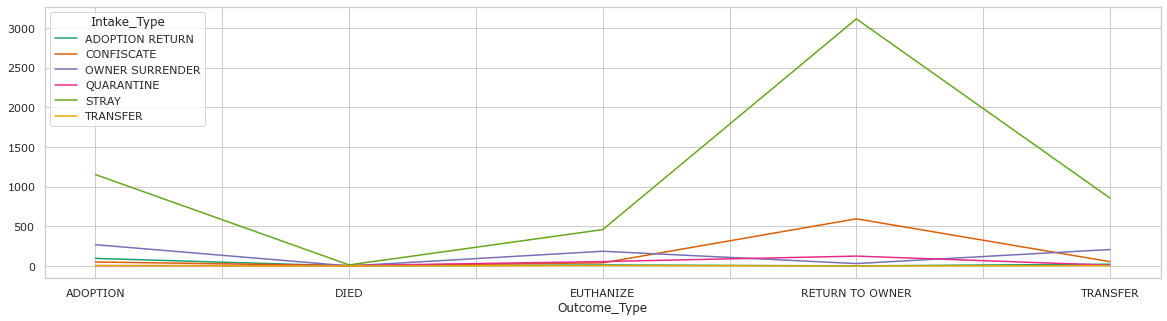

In [49]:
print('Count of Dogs Intake and Outcome')
Table7=pd.pivot_table(my_data, columns=['Intake_Type'],index='Outcome_Type',values='Breed', aggfunc=len, fill_value=0)
Table7.plot(figsize=(20,5))

There is no significant correlation between the type of intake and the dogs outcome. However, probably due to most strays being escaped pets, they are more likely to be returned to their owner than experience any other outcome. They same trend occurs in animals confiscated from their owner. They are more likely to be returned then have any other outcome.

# Conclusion

#### 1. What is the most common breed to go through the animal services?
The Pit Bull is consistantly the most populous breed to go through the shelter. Followed by the Chihuahua as the second most. The following 8 breeds interchange in standings through 2016-2020. Pit Bulls make up for 1/5th of the dogs that come through the shelter. The top 10 breeds consist of almost 70% of the dogs that come through the shelter.

#### 2. What is the breakdown between sex?
Total Female:  3166 
% Female:  43.0% 
Total Male:  4198 
% Male:  57.0%
Majority of the dog brought into the shelter between 2016-2020 were Neutered Males. Total males consist of almost 3/5 of the shelter dogs.

#### 3. What is the overall percentage breakdown of intake type? outcome type?
% Intake Breakdown:
    Adoption Return:1.78%
    Confiscate:	10.06% 
 	Owner Surender:	9.37% 
 	Quarantine:	2.68% 
 	Stray:		75.94% 
 	Transfer:	0.18%

% Outcome Breakdown: 
 	Adoption:	21.36% 
 	Died:		0.30% 
 	Euthanize:	10.25% 
 	Return to Owner:52.46% 
 	Transfer:	15.63%

#### 4. What is the average length of time the dog spends in the shelter?
Even with a data point of one dog staying over a year in the shelter, the average stay is 15 days. Half of all dogs stay less than 7 days. The data has a positive skew with most of the data being on the left side of the boxplot. 95% of the dogs stayed less than 54 days.

#### 5. Are there any outliers in length of stay?
There are many outliers within the dataset. This is represented in the boxplots. Eventhough, there are many dog who stayed over the 95-percetile of 54 days, the data is still positively skewed to zero.

#### 6. What breed has the highest average stay?
The English Foxhound has the highest average stay at 59 days.

#### 7. Does the length of stay effect the outcome type?
I assumed that the longer a dog was in the shelter, the more likely it would be euthanized or transfered. However, the data show no relationship between the length of stay and outcome of the animal. My original assumption was wrong, the outcome of adoption had the highest mean and median out of all the other Outcome Types.

#### 8. Is there a correlation between intake type and outcome?

There is no significant correlation between the type of intake and the dogs outcome. However, probably due to most strays being escaped pets, they are more likely to be returned to their owner than experience any other outcome. They same trend occurs in animals confiscated from their owner. They are more likely to be returned then have any other outcome.